# Nedělejme stejnou práci víckrát

Jedním ze základním principů při programování je znovupoužitelnost. Znovupoužitelnost, pokud je možná, vždy šetří čas, ať už programátora nebo výpočetní.
Nástin toho, jak lze šetřit práci programátora, jsme si ukázali v předchozích lekcích a měli bychom tuto myšlenku držet v paměti -- programujeme přeci právě proto, abychom si ušetřili práci v řešení úloh.
Další místo, kde lze ušetřit práci a přispět k efektivitě jakéhokoli snažení je nepočítat stejnou věc vícekrát.

Stejně tak, jako projektant stráví čas při návrhu domu, musí podle projektu poté dům někdo postavit.
Pokud projektant nezohlední možnost realizace jeho projektu, může se stát, že samotná stavba bude náročná, zdlouhavá nebo dokonce nemožná.

Stejně tak je tomu i v programování, pokud programátor bude upřednostňovat svou pohodlnost a bude krátkozraký ke svým dělníkům (procesoru, paměti...), může se stát, že program bude sice teoreticky správný a na pohled krásný, ale prakticky nepoužitelný.

Nezapomínejme tedy, že náš předpis pro řešení problému (kód programu), musí reálně počítač vykonat.

## Příklad

Pro snadnější pochopení si předcházející myšlenku ukážeme na příkladu, který se často používá jako ukázka závislostí při výpočtech a důsledky naivního přístupu.
Pro názornost a průhlednost prosím odpusťte méně praktickou úlohu.
Vytvoříme jednoduchou funkci, která bude počítat fibonacciho cisla podle definice:

$$F(0)=0,\quad F(1)=1$$
$$F(n)=F(n-1)+F(n-2)$$

## Úkol

Implementujte funkci `fibonacci(n: int)`, která bude počítat fibonacciho čísla podle definice. Funkce bude rekurzivní.


In [934]:
def fibonacci(n: int) -> int:
    # // TODO Doplňte kód naivní rekurzivní implementace výpočtu n-tého členu fibonacciho posloupnosti
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)


print(fibonacci(10))

55


Naše implementace funguje, pojďme se ale podívat, jaký objem práce musíme udělat, abychom zjistili hodnotu pro n = 5.
Algoritmus je formálně správný -- Je to pouze přepsaná definice pro fibonacciho čísla do programovacího jazyka.
Střetává se nám zde ale správnost algoritmu a jeho efektivita.
Následující obrázek ukazuje schéma výpočtu. Pokud bychom použili tuto jednoduchou, avšak naivní implementaci, museli bychom několikrát počítat stejnou věc.

![](https://home.zcu.cz/~sidoj/adt/.ipynb_images/3/tree.png)

V naší naivní implementaci pro fib(4) počítáme fib(2) dvakrát, fib(1) třikrát. Je patrné,že čím vyšší fibonacciho číslo budeme počítat, tím více se nám bude neefektivita projevovat (viz Experimenty s rychlostí).
Ve stromě, který vizualizuje výpočet, se toto projeví identickými podstromy.


In [935]:
from functools import wraps


def memoize(func):
    cache: dict[int, int] = dict()

    @wraps(func)
    def wrapper(*args, **kwargs):
        key = str(args) + str(kwargs)
        if key not in cache:
            cache[key] = func(*args, **kwargs)
        return cache[key]
    return wrapper


@memoize
def fibonacci_cache(n: int) -> int:

    # // TODO Doplňte kód rekurzivní implementace výpočtu n-tého členu fibonacciho posloupnosti s využitím cache
    if n <= 1:
        return n
    return fibonacci_cache(n-1) + fibonacci_cache(n-2)


print(fibonacci_cache(10))

55


Obě funkce máme připravené, můžeme si tedy naměřit čas, který potřebujeme na výpočet pro různá n a vizualizovat je.
Tentokrát použijeme trochu standardnější přístup k nasbírání dat a vizualizaci. Využijeme knihovny pandas, která je v podstatě průmyslovým standardem v datové analytice v jazyce Python. Jednoduše si naměříme všechny datové vzorky, které uložíme vždy po jednom do slovníku (n, čas, typ_algoritmu) a vytvoříme z nich list. Následně pomocí tohoto listu vytvoříme DataFrame, který nám spoustu operací s daty usnadní. Například vizualizace pomocí knihovny seaborn je velmi jednoduchá.


In [936]:
import time
import timeit
import seaborn as sns
# Pokud byste náhodou neměli nainstalováno, nainstalujte pomocí 'pip install pandas'
import pandas as pd
import timeit


def collect_data_for_drawing_1(n) -> list[dict]:
    data = list()  # list pro ukládání výsledků
    for i in range(0, n, 1):  # vypočítáme fibonacciho číslo pro n = 0, 1, 2, ..., n
        time_c = timeit.timeit(
            lambda: fibonacci(i), number=1
        )  # změříme čas potřebný pro výpočet pomocí naivního přístupu
        # uložíme si výsledek pro vizualizaci
        data.append({"n": i, "time": time_c, "type": "naive"})

        # cache = dict()  # vytvoření prázdné cache, aby naše měření bylo nezkreslené
        time_c = timeit.timeit(
            lambda: fibonacci_cache(i), number=1
        )  # změříme čas potřebný pro výpočet pomocí cache
        # uložíme si výsledek pro vizualizaci
        data.append({"n": i, "time": time_c, "type": "cache"})
    return data


data = collect_data_for_drawing_1(30)
data = pd.DataFrame(data)



<Axes: xlabel='n', ylabel='time'>

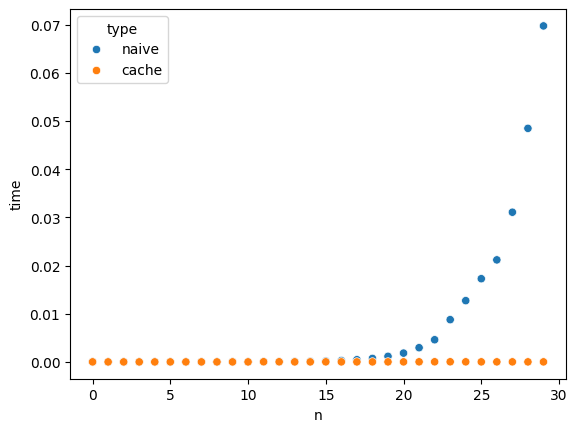

In [937]:
sns.scatterplot(data, x="n", y="time", hue="type")

Nemělo by nás překvapit, jak rychle se naše naivní implementace zpomaluje. Pro větší n se stává nepoužitelnou.
Naopak, implementace s cache je rychlá a efektivní. Výpočetní strom se nám nerozrůstá, protože si výsledky ukládáme a při opětovném volání je pouze načteme.

## Co dál?

Naším úkolem je nyní zamyslet se nad tím, jak bychom mohli zrychlit naši implementaci ještě více.
Skutečně potřebujeme pro výpočet fibonacciho čísla ukládat všechny mezivýsledky a navíc do slovníku?
Implementujme tedy funkci, která bude vracet výsledek pro n-té fibonacciho číslo, nebude ale používat rekurzi ani slovník pro ukládání mezivýsledků. Nejjednodušším způsobem je použít pole. V prvních dvou prvcích je výsledek jasný dle definice. Následně pole naplníme fibonacciho posloupností až po n-tou pozici. Toto je takzvaný "bottom-up" přístup. Porovnejte tento přístup s předchozími implementacemi užívající cache ve slovníku.


In [938]:
def fibonacci_arr(n: int) -> int:
    # // TODO Doplňte implementaci funkci fibonacci_arr, která bude počítat fibonacciho čísla pomocí pole
    arr = [0]*(n+2)
    arr[n] = 0
    arr[1] = 1
    for i in range(2, n+1):
        arr[i] = arr[i-1] + arr[i-2]
    return arr[n]
   

Nyní si ukážeme, jak se naše naivní implementace chová v porovnání s implementací, která si výsledky ukládá.


In [939]:


def collect_data_for_drawing_2(n):
    data = list()  # list pro ukládání výsledků
    for i in range(0, n, 1):
        time_c = timeit.timeit(lambda: fibonacci_cache(i), number=1)
        data.append({"n": i, "time": time_c, "type": "cache"})
        
        time_a = timeit.timeit(lambda: fibonacci_arr(i), number=1)
        data.append({"n": i, "time": time_a, "type": "array"})

        # tuto řádku neměňte, slouží pro přesnější měření urychlení v dalším úkolu
        time.sleep(0.01)
    return data


data = collect_data_for_drawing_2(100)
data = pd.DataFrame(data)


<Axes: xlabel='n', ylabel='time'>

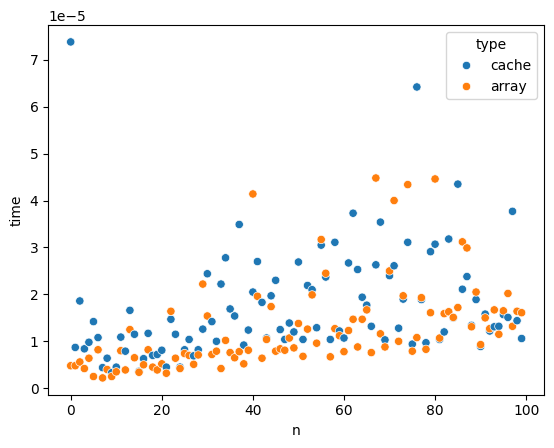

In [940]:
sns.scatterplot(data, x="n", y="time", hue="type")

Z našich experimentů je vidět jasná dominance jedné z metod. Tuto dominanci se pokuste vyčíslit pomocí následující funkce. Proveďte 100 různých měření na výpočtu fibonacciho čísla 50 a výsledky si uložte do seznamu. Výsledné urychlení spočítejte jako průměrné urychlení na všech naměřených hodnotách. Urychlení spočítejte jako podíl type_cache / type_array.


In [941]:
def count_speedup(ntimes=100, fib_max=50):
    speedups = list()
    for i in range(0, ntimes):
        speedup = 0
        data = collect_data_for_drawing_2(fib_max)
        data_cache = data[0]
        data_arr = data[1]
        speedup = data_cache["time"] / data_arr["time"]
        speedups.append(speedup)
        print(f"Measuring spqqdup {i}: {speedup}")
        time.sleep(0.01)  # tuto řádku neměňte, slouží pro přesnější měření,
    avg_speedup = sum(speedups) / ntimes
    return avg_speedup


# // TODO Následující řádek je poměrně výpočetně náročný, pro odevzdání a validaci domácího úkolu jej prosím zakomentujte, nebo smažte.
# print(count_speedup())

## K zamyšlení

Zkuste se zamyslet nad tím, jaké faktory vedou k dominanci jedné z dvou metod, které používají ukládání mezivýsledků. V několika málo větách popište své závěry (Odpověď vypište mezi speciální značky (značky zachovejte) místo textu "zde bude vaše úvaha").


In [942]:
# TODO Vaše úvaha
# <STUDENT_ANSW>Cache bude výhodnější pro větší čísla a list/arr bude výhodnější pro ta menší. Když se podívám na data jako taková, tak v listu se nachází klíč pomocí kterého najdeme data, u arraye je tato věc sečtená dohromady, takže se musí napřed rozdělit</STUDENT_ANSW>

# Pro zvědavé

Toto vlákno rozebírá problematiku více do detailu. https://stackoverflow.com/questions/6164629/what-is-the-difference-between-bottom-up-and-top-down
